In [1]:
#依赖包导入cell，请执行此cell导入相关依赖包
from sklearn.cluster import KMeans,DBSCAN
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor

In [2]:
#第二步，数据选择
def select(d0, Pmin, Pmax,scale=20, select=0):
    d3 = d0[0:0]
    box_num = int((Pmax-Pmin)/scale+1)
    box_min = Pmin
    box_max = box_min + scale
    for i in range(box_num):
        box = d0[(d0.Power>=box_min) & (d0.Power<box_max)]
        if len(box)<=0:
            box_min += scale
            box_max += scale
            continue

        row_Wmin = box[box.WindSpeed==box.WindSpeed.min()][0:1]
        row_Wmax = box[box.WindSpeed==box.WindSpeed.max()][0:1]
        
        if select == 0 or select==-1:
            d3 = d3.append(row_Wmin)
        if select == 0 or select==1:
            d3 = d3.append(row_Wmax)

        box_min += scale
        box_max += scale
    
    return d3
#手动设定规则
d0 = df[df['label']==0]
d1 = df[df['label']==1]
d3 = select(d0,600,1900,50,-1)

def enselect(d1,d3, Pmin, Pmax,scale):
    d0 = d1[0:0]
    d3 = d3.sort_values(by='Power')
    box_num = int((Pmax-Pmin)/scale+1)
    box_min = Pmin
    box_max = box_min + scale
    for i in range(box_num):
        box = d1[(d1.Power>=box_min) & (d1.Power<box_max)]
        if len(box)<=0:
            box_min += scale
            box_max += scale
            continue
        
        pair = list(d3.WindSpeed[i*2:i*2+2])
        pair.sort()
        rows = box[(box.WindSpeed>=pair[0]) & (box.WindSpeed<=pair[1])]


        d0 = d0.append(rows)
        
        box_min += scale
        box_max += scale
    
    return d0


In [154]:
#第一步，导入数据
WindNumber=6
df = pd.read_csv("dataset.csv")
df1 = pd.read_csv("submission_WN10_changed.csv")
# df1 = pd.read_csv("submission_ALL_change_1017_F24681012_2.csv")
df = df[df['WindNumber']==WindNumber]
df1 = df1[df1['WindNumber']==WindNumber]

df = df.sort_values(by="Time")
df1 = df1.sort_values(by="Time")
df['label']=list(df1['label'])

In [ ]:
#第四步，调节异常数据二次接受域
d3 = df[ (df['label']==1) 
        & (df.Power>1300)
        & (df.Power<1500) 
        & (df['Power']>=
            model.predict(np.array(df.WindSpeed).reshape(-1,1)))
        & (df['Power']<=
           model.predict(np.array(df.WindSpeed).reshape(-1,1)+0.75))]

d1 = d1.drop(d3.index)
d3['label'] = 0
d0 = d0.append(d3)
print(len(d0),len(d1),len(d3),len(d0)+len(d1))

In [156]:
#手动设定规则
d0 = df[df['label']==0]
d1 = df[df['label']==1]
# d3 = df[(df['WindSpeed']<=5) & (df.label==0)&(df.Power>df.WindSpeed*110-400)]
# d3.label=1
#         & (df.WindSpeed>3.9)& (df.WindSpeed<4.1)]
# d3 = df[ (df['label']==0) & (df['Power']>1700) & (df['WindSpeed']<15) & (df['WindSpeed']>13) & (df['Power']<2050)]

d3 = select(d0,600,1900,50,-1)
d3 = df[ (df['label']==0) &  (df['Power']>=model.predict(np.array(df.WindSpeed).reshape(-1,1)))
        & (df.Power>1300)& (df.Power<1500)]
        & (df['Power']<=model.predict(np.array(df.WindSpeed).reshape(-1,1)+0.8)+200)
        & (df.WindSpeed>3.5) & (df.WindSpeed<9)
        
#        &  (df['Power']<=model.predict(np.array(df.WindSpeed).reshape(-1,1)+0.75))
       
#        
#        &  (df['Power']<=model.predict(np.array(df.WindSpeed).reshape(-1,1)))& (df.WindSpeed<10)]
# & (df['Power']>=model2.predict(np.array(df.WindSpeed).reshape(-1,1)))
# d3 = enselect(d1,d3,0,1900,50)
# d3 = d3[(d3.WindSpeed<4) & (d3.Power>50)]
# d3 = df[ (df['label']==1) & (df['Power']>30) & (df['WindSpeed']<5.3)  & (df['WindSpeed']>5) & (df['Power']<100)]
# d3 = df[ (df['label']==0) & (df['Power']<1750) & (df['Power']>=1600) & (df['WindSpeed']>=7) & (df['WindSpeed']<=10.5)]

# # #
# # # #倘若规则设定好请解除掉下方四行代码注释
# # # # # #

print(len(d0),len(d1),len(d3),len(d0)+len(d1))
# d3.label=1
# d4 = pd.merge(d1,d3)
# print(len(d4))
# d1 = d1.append(d4).drop_duplicates(keep=False)
# print(len(d1))
# d3['label'] = 0
# d4 = pd.merge(d0,d3)
# print(len(d4))
d0 = d0.drop_duplicates(['Power','WindSpeed','Time'],keep=False)
# print(len(d0))
# d0 = d0.append(d3)

print(len(d0),len(d1),len(d4),len(d0)+len(d1))


#风机9，删除下面曲线数据
# d3 = df[ (df['label']==0) & (df['Power']<1750) & (df['Power']>=1300) & (df['WindSpeed']>=11) & (df['WindSpeed']<=18)]

24827 20765 2981 45592
24783 20765 1847 45548


In [521]:
#限定Power范围
Pmin =0#1250
Pmax =750#1550
d1 = d1[(d1.Power>=Pmin) & (d1.Power<=Pmax)]
d0 = d0[(d0.Power>=Pmin) & (d0.Power<=Pmax)]
# d3 = d3[(d3.Power>=Pmin) & (d3.Power<=Pmax)]

In [246]:
#细精简d3
tempT=d0.Time
a = 374
b = -2412
d0.Time=pd.to_datetime(d0.Time,format='%Y/%m/%d %H:%M')
# d3 = d0[(d0.Power<d0.WindSpeed*a+b)]
d3 = d0[(d0.Time.dt.year==2018)  &(d0.Power<d0.WindSpeed*a+b)&(d0.Time.dt.month==3)]#、48    36(374,-2312)
# d3.Time = tempT[(d0.Time.dt.year==2018)  &(d0.Power<d0.WindSpeed*a+b)&(d0.Time.dt.month>1)]#注意不要重复执行
print(len(d3))

112


In [44]:
d3 = d3.drop(d3[9:10].index)

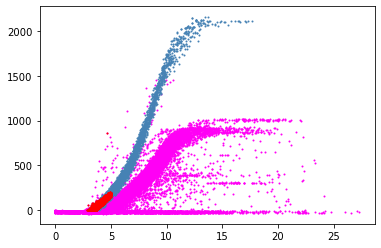

In [95]:
#第三步，结果绘图，观察规则效果
plt.scatter(d1['WindSpeed'],d1['Power'],c='#FF00F5',s=1)
plt.scatter(d0['WindSpeed'],d0['Power'],c='#4682B4',s=1)




plt.scatter(d3['WindSpeed'],d3['Power'],c='#FF0000',s=1)

# print('正常数据:',len(df),'异常数据:',len(dl))
plt.show()

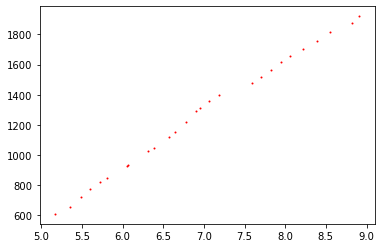

In [491]:
#第三步，曲线拟合
model = GaussianProcessRegressor()
x = np.array(d3.WindSpeed).reshape(-1,1)
y = np.array(d3.Power)
model.fit(x, y)
z = model.predict(x)

# plt.scatter(d3.WindSpeed, d3.Power, s=1, color='b')
plt.scatter(d3.WindSpeed, z, s=1, color='r')
plt.show()

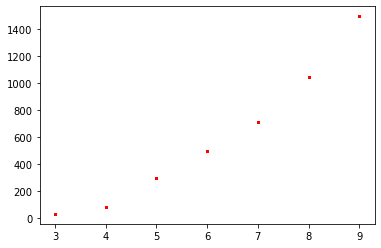

In [86]:
x = np.random.randint(3,10,500).reshape(-1,1)
z = model.predict(x)
plt.scatter(x, z, s=1, color='r')
plt.show()

In [39]:
#计算线性方程
def getab(x1,y1,x2,y2):
    a = (y2-y1) / (x2-x1)
    b = y1 - a*x1
    return a,b
getab(4,0,5,100)

(100.0, -400.0)

In [31]:
#数据替换与保存
d0 = d0.append(d1)
df1 = pd.read_csv("submission_ALL_change_1017_F24681012.csv")
df1 = df1.drop(d0.index)
df1 = df1.append(d0)
df1 = df1[['WindNumber','Time','label']]
df1 = df1.sort_index()

df1.to_csv("submission_ALL_change_1017_F24681012_2.csv",index=None)

c:\users\24320\envs\env_protection\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
